## Entertaining Felines

### Table of Contents
- [Introduction](#Introduction)
- [Target Clients](#Target-Clients)
- [Hardware](#Hardware)
- [Hardware Detour](#Hardware-Detour)
- [Imports](#Imports)
- [Picture Files](#Picture-Files)
- [Going from Video to Image Files](#Going-from-Video-to-Image-Files)
- [Identifying Cat Pictures](#Identifying-Cat-Pictures)
- [Convolutionial Neural Networks: Keras](#Convolutionial-Neural-Networks:-Keras)
- [Software Detour](#Software-Detour)
- [Convolutionial Neural Networks: Tensorflow](#Convolutionial-Neural-Networks:-Tensorflow)
- [Final Dataset Attempt](#Final-Dataset-Attempt)
- [Collecting Images](#Collecting-Images)
- [Communicating With the Arduino](#Communicating-with-the-Arduino)
- [User Testing](#User-Testing)
- [Final Verdict](#Final-Verdict)
- [Future Work](#Future-Work)
- [References](#References)

## Introduction

This quarter, we have been learning about prototyping interactive systems. I signed up for this class, hoping it would help me develop more as a "Maker," as I had gotten a bit of a start with a 3-D printing class a while back, but I hadn't explored other technologies, and I hadn't continued doing any physical computing beyond that class. This project is my attempt to bring together the different elements of what we learned over the course of the quarter. At the beginning of the class, I was introduced to the [Arduino](https://en.wikipedia.org/wiki/Arduino) [Leonardo](https://www.arduino.cc/en/Main/Arduino_BoardLeonardo) in two assignments that had us creating interactive nightlights. It was my first experience using Arduino boards, and I enjoyed it quite a lot. For this project, I was hoping to return to the Arduino universe. I experiemented at length with the [Adafruit TTL Serial Camera](https://learn.adafruit.com/ttl-serial-camera/overview), but ultimately had to accept that it was not suitable for my needs, at least with the Arduino components I currently own. (There will be a section describing my experiences with this camera later, for anyone who might be interested.)

Ultimately, I ended up recruiting my laptop's camera for this project, as it enabled me to bypass some of the places were human intervention would have been required using the Arduino camera. Ideally, the camera used in a future prototype would be its own entity (like the Arduino camera), but would transmit its image data more smoothly than that camera does.

But never fear! My project still uses Arduino technology!

## Target Clients

I have two very intelligent cats, Gandalf (the white cat) and Tatlim (the brown cat).

[](attachment:gandalf_tatlim.jpg)
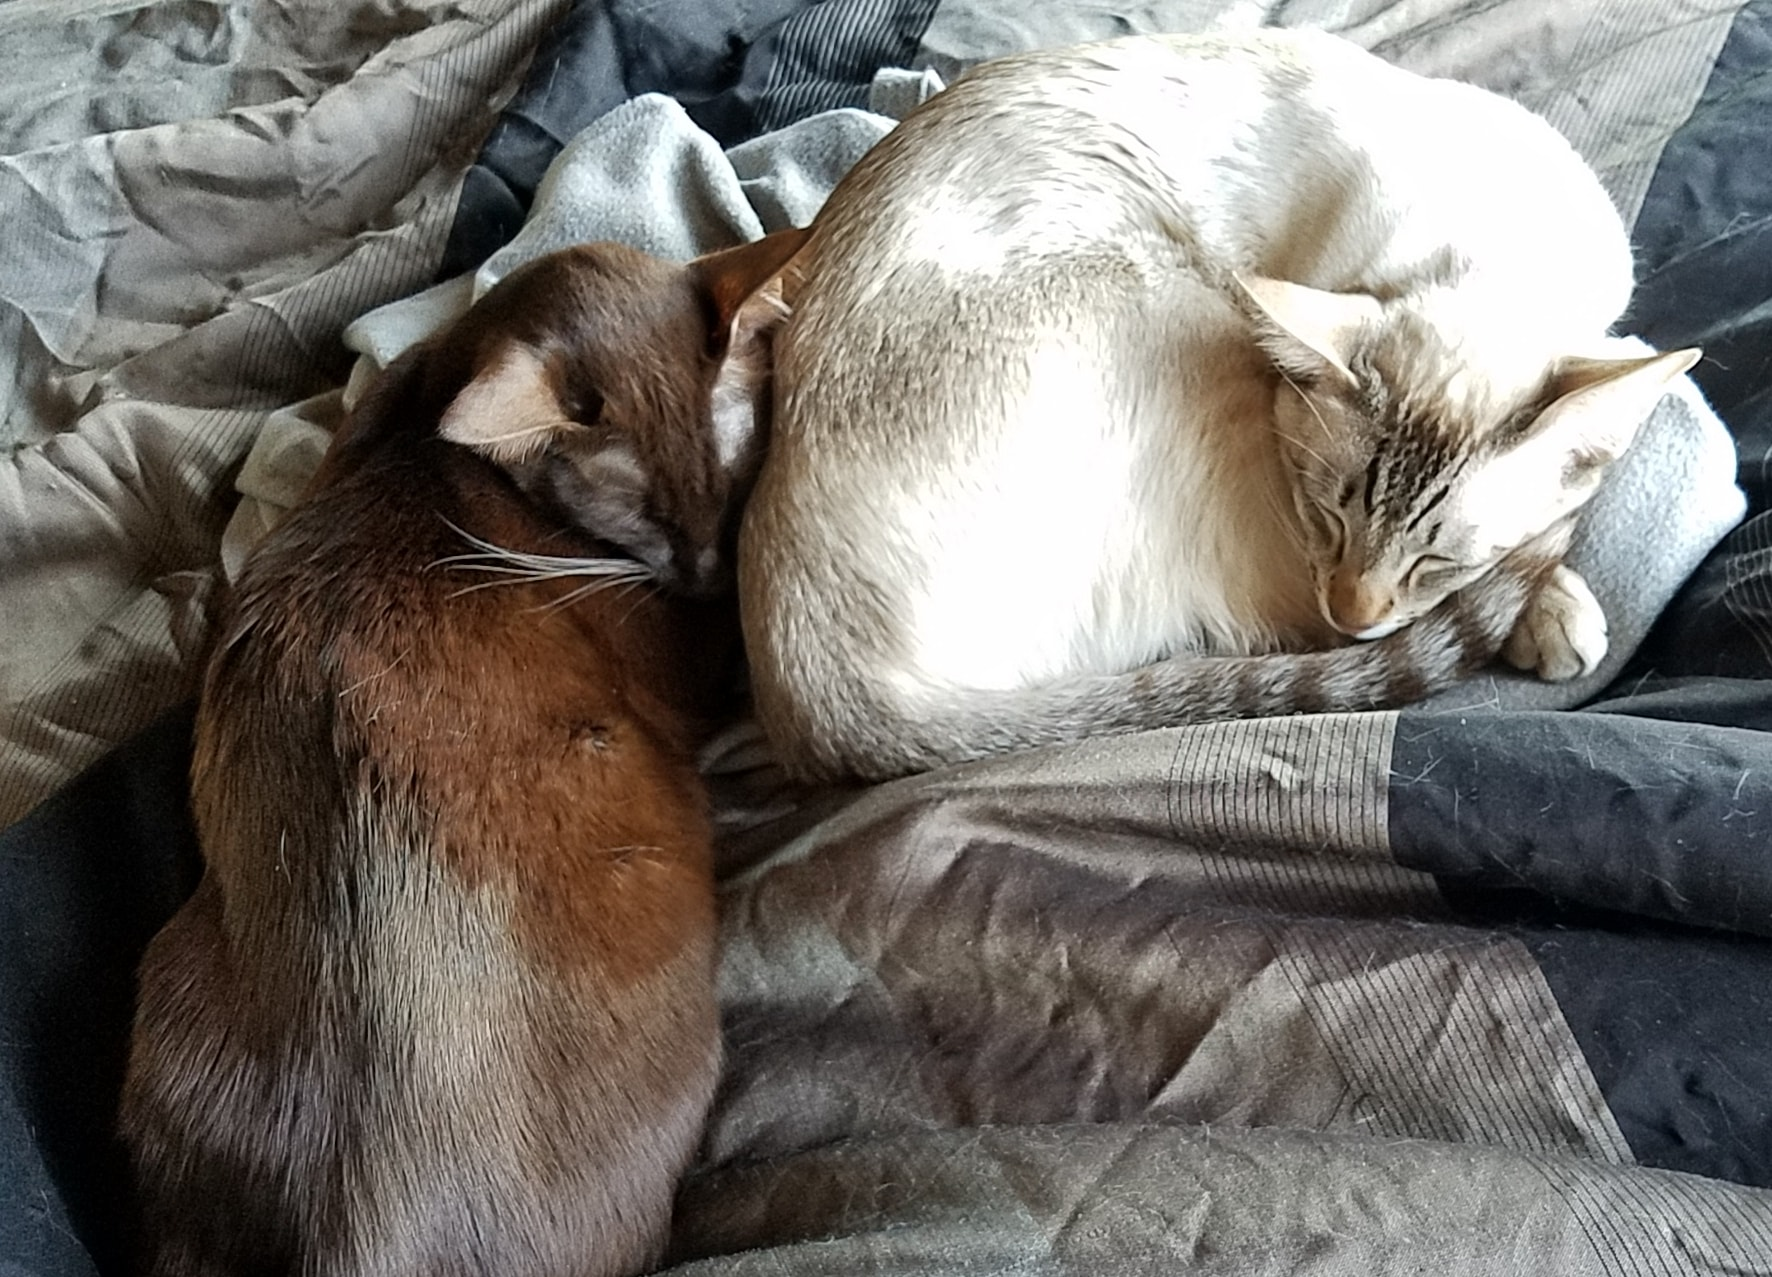

They like to play, but I don't always want to play *with* them (I'd rather they just curl up near me and purr). So, because I am lazy and they would prefer to be active, I have gotten them **lots** of cat toys. And sometimes, they even play with one. The main problem seems to be that the toys don't *move*.

This project will try to provide a solution to this problem.

## Hardware

As mentioned in the [Introduction](#Introduction), I experimented with different categories of hardware while working on this project.

## Hardware Detour

I happen to have an Adafruit TTL Serial Camera -- I got it hoping to use it for this project. It is pretty neat, and I had a lot of fun playing around with it, following this [tutorial](https://www.mouser.com/ds/2/737/ttl-serial-camera-932886.pdf), but there were a number of problems that soon became evident using this approach:

- The camera communicates with the Arduino by "hijacking" the serial port. This makes it difficult to communicate with Arduino.
- The camera is controlled using a GUI (which requires human intervention to push buttons on the GUI) -- I did not see a way around this issue.
- The camera GUI only runs in Windows -- this required that I install [Parallels Desktop for Mac](https://www.parallels.com/welcome-trial/) on my machine. This was an interesting experience, and actually was a lot simpler to do than I was expecting. For a long-term solution, this would not be great, as the software is not free, beyond the initial 2-week free trial.


## Imports

In [ ]:
# additional imports take place later, associated with the code they support
import cv2
from matplotlib import pyplot as plt
from IPython.display import HTML # To display a Youtube video in the notebook
import os # allows us to create new diectories and sub-directories
import cv2 # computer vision library - for working with images
import random
import shutil # for copying files
import serial # to connect Python & Arduino

## Picture Files

To start out, I wanted to play around with some picture files, to make sure I was able to load and manipulate them. I found a number of tutorials online that sounded potentially helpful, so I started working through some of them. This OpenCV tutorial was very useful.

[Installing and Loading Images](http://www.dmi.unict.it/~furnari/teaching/CV1617/lab0/)

This section describes tutorials I looked at to round out my learning. _If_ I were to attempt to classify photos using the techniques we explore in the last two assignments (shape-matching and feature-based classification using a Support Vector Machine (SVM)), these methods would be important to me. Even though I will be using a different classification this time (a [Convolutional Neural Network](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/) (CNN)), I still found it helpful to think about what "unique features" of a cat might contribute to an accurate classification.

In [ ]:
# Following this tutorial for basic image manipulations
#http://www.dmi.unict.it/~furnari/teaching/CV1617/lab0/

img=cv2.imread('smokey.jpg')

In [ ]:
print(img.shape)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
# fix colors - use the cv2.cvtcolor function to convert the image from BGR to RGB.
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [ ]:
# Using numpy indexing capabilities to flip the order of the channels:
# (so this command does the same as the one in the previous cell)
plt.imshow(img[...,::-1]) #this conversion can be performed inline!
plt.show()

In [ ]:
# blurring
img_g=cv2.GaussianBlur(img,(15,15),7) #use a 15x15 Gaussial kernel with standard deviation 7
plt.imshow(img_g[...,::-1])
plt.show()

In [ ]:
# greyscale
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape) #now the image has just one channel
plt.imshow(img_gray[...,:],cmap='gray') #cmap='gray' is required to show the image correctly
plt.show()

In [ ]:
# sobel derivatives
img_sobel_x=cv2.Sobel(img_gray,-1,1,0) #x-derivative set to 1, y-derivative set to 0
img_sobel_y=cv2.Sobel(img_gray,-1,0,1) #x-derivative set to 0, y-derivative set to 1
print(img_sobel_x.shape)
print(img_sobel_y.shape)

plt.subplot(1,2,1)
plt.imshow(img_sobel_x[...,::-1],cmap='gray')
plt.title('Sobel X')
plt.subplot(1,2,2)
plt.imshow(img_sobel_y[...,::-1],cmap='gray')
plt.title('Sobel Y')
plt.show()

In [ ]:
# edge detection
img_canny = cv2.Canny(img,180,200)
plt.imshow(img_canny[...,::-1],cmap='gray')
plt.show()

OK -- so I can load and work with images. Yay!
I was not too worried about this section of the project, as I have worked with image files in the past (I have TA'd classes that included assignments requiring image manipulation).

Now I need to *collect* images.

The OpenCV tutorial covers this topic as well, so on to something completely new to me.

This code below *sort of* worked -- it displayed the image from my camera to my screen.

However, there were issues:
- The image was displayed upside down (minor)
- The camera window could not be closed (more of an issue)
- Interrupting the kernel let me keep working,  but didn't do anything about the large open window.
- The output file generated was not usable -- my computer could not open the file, even after I had downloaded the programs that should have been able to.

The image orientation would be easy enough to fix, but the other issues made this tutorial code unworkable.
For this reason, the code below is not displayed in a code cell. Still, even though this ended up not being ideal for my needs, it was useful in learning how the process worked.

```
# This code sort of worked -- it displayed the image from my camera to my screen.

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0) # This is flipping my image!

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
           break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
```

Since I still need to accomplish the task of capturing images, I looked for another tutorial.

I found one on [Writing to video with OpenCV](https://www.pyimagesearch.com/2016/02/22/writing-to-video-with-opencv/). However, it assumes the user is at the command line, not in a notebook, so to deal with this, I put the code in a .py file that can be run from the notebook (See: write_to_video.py).

When run, this file activates the camera and shows a set of 4 images -- which is not strictly necessary. The code was modified so that only the originally captured frame is displayed (and stored) in the final output.

This code *also* closes the window when requested (**by pressing 'q'**) -- which is *really* nice!

Unfortunately, the 'q' has to be pressed *IN* the window.

To get around this issue, I modified the code to have the camera on for 5 seconds, only.

In [ ]:
# https://www.pyimagesearch.com/2016/02/22/writing-to-video-with-opencv/
# This runs when the tutorial code is in a .py file
# Not sure what the changes would be to run fully from within the notebook, 
# as far as arguments go, but this is a start and is functional using the ! method.
!python write_to_video_v2.py -o "second.avi"


## Going from Video to Image Files

So -- now I am able to capture video. But I don't actually want to analyze video files. Instead, I want to grab a single frame from the video (or perhaps a set of frames, taken at some time interval apart). I found a [StackOverflow](https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames) question that seemed to be applicable. Amazingly, it worked straight off!

The only (tiny) issue is that it results in a *ton* of image files -- way more than we need.

So, the code was modified to save only every nth frame.

[Top](#Entertaining-Felines)

In [ ]:
# https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames

print(cv2.__version__)
n = 20
video = 'second.avi'
vidcap = cv2.VideoCapture(video)
success,image = vidcap.read()
count = 0
captured = 0
success = True
while success:
    if count % n == 0:
        cv2.imwrite("./captured_images/frame%d.jpg" % count, image)     # save frame as JPEG file
        captured += 1
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1
print("captured %d images" % captured)  

This is great -- now I have a set of images that I can test for the presence/absence of cats. I will also want a way to **empty** this folder, once the images have been processed, so that the system can be reset.

This [Stackoverflow topic](https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder-in-python) provided the imformation I needed.

In [ ]:
# https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder-in-python
images_directory = './captured_images'

for the_file in os.listdir(images_directory):
    file_path = os.path.join(images_directory, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        #elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)

I would also like to be able to run the .py file from within a code cell that contains Python code. I am not sure this is "legal," so I will try it out.


In [ ]:
for i in range(100):
    if i == 42:
        !python write_to_video_v2.py -o "second.avi"
    i += 1
        

Well -- That seemed to work just fine.
I am hoping that I will be able to use similar code where the trigger is a signal received from the Arduino, signaling that the proximity sensor has been activated. I used [this sensor](https://www.adafruit.com/product/3942?gclid=CMbX-tWa3eICFWkerQYdRH0DZA) in an earlier project for this class, so getting it to work for this project shouldn't be too difficult.

I used [this tutorial](https://www.winkleink.com/2012/05/arduino-hc-sr04-ultrasonic-distance.html) as guidance, because it uses the sensor without a digital display, which is what I want to do also. However, instead of just printing messages to the serial monitor, I want to use this sensor to trigger the camera to start filming. 

## Identifying Cat Pictures

Now, we have code to activate the camera, take a video, parse the video file to capture a smaller set of frames as flat image files. All we need is to figure out which of our images has a cat (at least one cat). Not surprisingly, this has been a task of some importance to at least a few people on the internet. Conveniently, there is a [collection of cat and dog images on Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data).

-- and a [handy tutorial](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)!

First, let's take a look at some of the "dog" photos:

In [ ]:
# From: https://tinyurl.com/yxo6o487

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogs-vs-cats/train/'

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

And the much superior collection of cats:

In [ ]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogs-vs-cats/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

**GREAT!** We have photos -- but they are not all the same size.

Our classification task would be easier if they were, so we will manipulate them into a uniform size as part of our file processing.

[Top](#Entertaining-Felines)

## Convolutionial Neural Networks: Keras

Both of the tutorials I followed used CNNs -- the first used [Keras](https://keras.io/), while the second used [Tensorflow](https://www.tensorflow.org/). The first (Keras) tutorial ended up not meeting my needs, but was a useful learning experience. I thought about why it might not have been the best approach for my project, and came up with the following possibilities:

- It relies on the full dataset to achieve its high accuracy. While this is not a *bad* thing, there are reasons why the full dataset itself, is not ideal for direct use in my situation.
- It was written to be run on a more powerful system than I am using (the author mentions that he used AWS with a p3 instance (GPU), and it still took a couple of hours to run). I tried running the author's code on the full Kaggle dataset, and it hadn't finished after running overnight (at which point I interrupted it).
- It is solving a problem that is actually harder than the problem my system should encounter -- namely, distinguishing between cats and dogs. As I don't have any dogs, and do not intend to use this with dogs, my system does not need to be trained on this. Instead, I really need more of a cat/non-cat differentiator.
- After a certain level of accuracy with a given model, perhaps incremental improvements take a lot more effort (and, therefore, computation)

First, I will run through the first model attempted, and comment on my experience with using it.

The next 2 code cells set up directories and separate the data set. They ran with no issues.

In [ ]:
# create directories
dataset_home = 'non_cats_vs_cats_data/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['non_cats/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)


In [ ]:
# seed random number generator
random.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'non_cats_vs_cats/train/'
for file in os.listdir(src_directory):
	src = src_directory + file
	dst_dir = 'train/'
	if random.random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		shutil.copyfile(src, dst)
	elif file.startswith('non_cat'):
		dst = dataset_home + dst_dir + 'non_cats/'  + file
		shutil.copyfile(src, dst)

## Software Detour

The following code cell was interrupted after running overnight on the full data set without finishing. I then went back to the cats and dogs photo file and chose a _subset_ of photos to work with. Cats and dogs have a lot of similarities, so I imagine they would be difficult to differentiate. Fortunately, I only have cats (no dogs), so I don't have to distinguish between different kinds of pets. Anyway, the bottom line is, even though I think removing data available for training will make the model less robust and reduce overall accuracy, I just want to test that the code works at this point.

I did the following:

- out of 25,000 training images (12,500 each of cats and dogs), I took the first 500 cat images and the first 500 dog images.
- out of the 12,500 testing images, I took the first 500 images.

With this reduced dataset, the model took about 10 minutes to fit, but only achieved around 44% accuracy. In the tutorial, using the full training set, the baseline model achieved an accuracy of about 72% on the full test dataset (and reportedly took approximately 20 minutes to run on modern GPU hardware).

**NOTE:** When the model fitting was repeated with commands to make the plots display inline in the notebook, the accuracy was around 50% ( a result of the stochastic nature of the algoritihm).


**UPDATE:**

Next, I replaced some of the dogs in the dataset with "non_cat" photos from my personal files. These photos were of random subjects (the main common feature was they they did *NOT* include cats) -- e.g. landscapes, food, people, etc.

I used these images (200 in the training set and 100 in the testing set) along with the provided dog and cat images, so that there were still 1000 training images and 500 testing images.

*This is the data set that the remainder of the code for this model uses.*

[Top](#Entertaining-Felines)

In [ ]:
# Develop a Baseline CNN Model - with One Block VGG Model

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('non_cats_vs_cats_data/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	print("trained")
	test_it = datagen.flow_from_directory('non_cats_vs_cats_data/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	print("tested")
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

One nice thing about this tutorial is the loss and accuracy plots it produces. In these plots, the lines represent the train (blue) and test (orange) datasets. For comparison, I am including the plots the author obtained using the full data set:

[](attachment:Screen%20Shot%202019-06-09%20at%208.27.24%20AM.png)
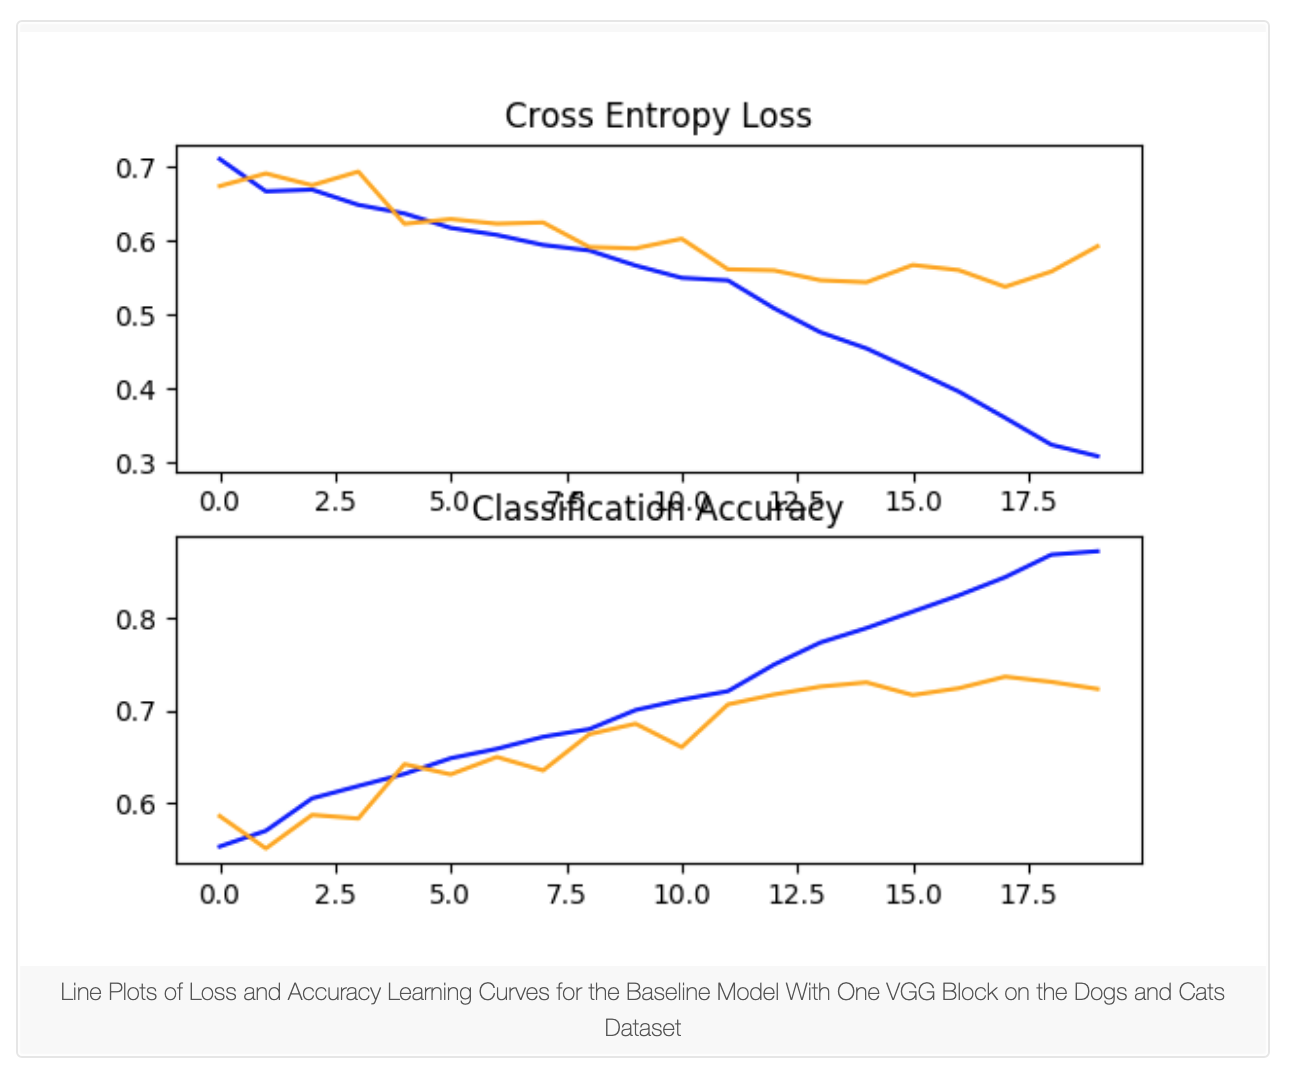

I think that because I am using a smaller dataset, I am seeing less consistency in the results (e.g. the dip in accuracy near 7 epochs. It is also hard to determine if the model is overfitting my training dataset the way the author's plot shows at around 12 epochs.

As described in this [blog post](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9), an epoch is the term used to describe passing the entire dataset forward and backward through the neural network **ONE** time. To optimize learning, and to prevent underfitting, the dataset needs to be passed through the neural network *multiple* times, with weights adjusted each time. In this way, the model goes from underfitting the data, to fitting it optimally, to overfitting it. Choosing how many epochs are best for a given dataset depends on factors such as how diverse the dataset is.

With large datasets, the entire dataset can't be passed to the neural network all at once, so it is divided into smaller *batches*. The number of batches determines the number of *iterations* needed to complete one epoch.

In [ ]:
# Two Block VGG Model

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
    # new commands -- adding the second block
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness again
run_test_harness()

The accuracy using the two block VGG model increased to about 60% with the dog & cat photos.

Using my modified cat/non_cat images, the accuracy increased to about

Next, we'll try a 3-block VGG model:

[Top](#Entertaining-Felines)

In [ ]:
# Three Block VGG Model

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness again
run_test_harness()

Hmm... not much of an improvement.

To summarize:

Using the 1000 train subset and 500 test subset:

- **VGG 1**: 50.661
- **VGG 2**: 59.912
- **VGG 3**: 61.674

In comparison, **using the full train and test sets**, this approach **should have yielded** results more like the following:

- **VGG 1**: 72
- **VGG 2**: 77
- **VGG 3**: 80

Using the 1000 train subset with 200 non_cat phots replacing dog photos and the 500 test subset with 100 non_cat photos (replacing a random mix of cat AND dog photos, presumably).

- **VGG 1**: 61.674
- **VGG 2**: 67.841
- **VGG 3**: 61.674 / 67.841 (ran the VGG 3 model twice)

Hmm... Looks like the VGG 2 model is performing best, although I'm guessing the decilne in performance with the VGG 3 model compared to the VGG 2 model is due to stochasticity, and that both models are performing at roughly the same level (i.e. no real improvement with the three block model).

The following code cell was intended to improve the performance of the model even further. It uses the three block VGG (VGG 3) as its baseline model and attempts to reduce the overfitting that was seen in all the runs that used the original data. To do this, it uses two different techniques, [dropout regularization](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/) and [data augmentation](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/).

Dropout regularization probabilistically removes inputs to a layer of the neural network. This, in effect, simulates a larger number of networks having different network structures. In the author's example, this increased the accuracy of the model from 80% to 81% and increased the number of epochs required from 20 to 50.

Data augmentation is a method to artificially enlarge the size of the training dataset (which was already quite large) by creating modified versions of the images in the dataset. This increased the author's results from an accuracy of 80%, for the baseline model, to 85% (over 50 epochs).

I didn't really expect these improvements to do much for my model, as the dataset I am using is much smaller and I am not convinced the model is overfitting on my data, but the techniques sounded neat, so I wanted to try them out.

In [ ]:
# Develop Model Improvements

# Dropout Regularization

# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	#model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	#model.add(MaxPooling2D((2, 2)))
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory('non_cats_vs_cats_data/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('non_cats_vs_cats_data/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

With the reduced dataset (a simple subset of the original dataset), dropout regularization did not improve the results:

- **VGG 3**: 61.674
- **VGG 3 w/ Dropout Regularization**: 52.423

AND it took over an hour to run.

Using the reduced dataset with some photos replaced with personal photos (i.e. replacing 200/500 dog training images and 100/500 test images with my own photos), I re-ran the model fitting (the code above reflects this now):

- **VGG 2**: 61.674
- **VGG 2 w/ Dropout Regularization**: 55.947

So, better than with the cat/dog images, but still not an improvement from just using the baseline VGG 2 model. 
I guess these methods really do depend on having **large** sets of training and testing images to be effective.


This is a good start. I know I should be able to classify cat and non-cat images accurately about 2/3 of the time (with improvements possible if I want to use larger training sets and spend more time fitting the model).

Except -- working with this model is taking too much time and is making my prototyping process difficult to iterate over.

So, off to find another tutorial....

[Top](#Entertaining-Felines)

## Convolutionial Neural Networks: Tensorflow

[This tutorial](https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b) also uses convolutional neural networks, this time using Tensorflow. It takes what seems to me to be a pretty similar approach. I tried it first on the full dataset, and it finished in a "reasonable" amount of time on my laptop (20 minutes). I found it interesting to see that this model also uses a dropout layer.

In [198]:
# https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b
# ALSO PUBLISHED AT: https://www.curiousily.com/posts/building-cat-detector-using-convolutional-neural-networks/

import cv2
import numpy as np
import os         
from random import shuffle 
from tqdm import tqdm      
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
%matplotlib inline
TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'

In [199]:
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-3]
    if word_label == 'cat':
        return np.array([1,0])
    elif word_label == 'dog':
        return np.array([0,1])

In [200]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img_data), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [201]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
train = train_data[:-500]
test = train_data[-500:]
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]

100%|██████████| 12500/12500 [00:21<00:00, 594.28it/s]


In [202]:
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10, 
          validation_set=({'input': X_test}, {'targets': y_test}), 
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.33456 | time: 80.304s
| Adam | epoch: 010 | loss: 0.33456 - acc: 0.8606 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.32270 | time: 81.515s
| Adam | epoch: 010 | loss: 0.32270 - acc: 0.8652 | val_loss: 0.51554 - val_acc: 0.7940 -- iter: 24500/24500
--


## Testing the Model: Predicting for Individual Images

cat: 0.2884896397590637, dog: 0.711510419845581


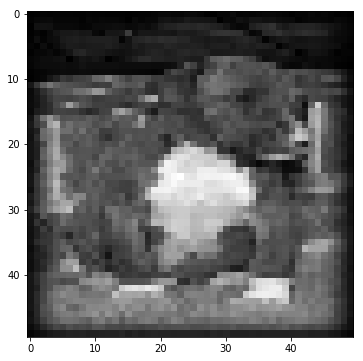

In [204]:
d = test[6]
#print(d)
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
print(f"cat: {prediction[0]}, dog: {prediction[1]}")

This image of a dog, from the 'test' dataset, is correctly identified.

Next, I created a new directory, 'current_image', so that I have a place to store images for the model to classify without going through the training process again. The photographs in this folder will be processed to be resized and changed to grayscale, as the model expects.

[Top](#Entertaining-Felines)

In [205]:
CLASSIFY_DIR = 'cat_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_num])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

100%|██████████| 2/2 [00:00<00:00, 29.44it/s]


cat_images/gandalf_sleeping.png
cat_images/gandalfbox.jpg
cat: 0.3085187077522278, dog: 0.6914812326431274


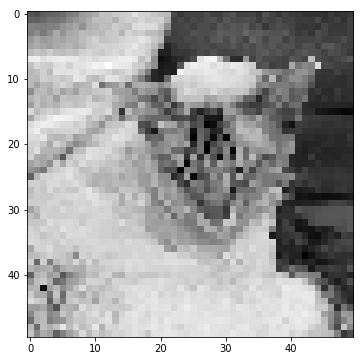

In [206]:
classifying_data = create_classify_data()
# I want all these photos classified 
# (I am not splitting this set of photos for train/test)
classify = classifying_data[:] 
X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_classify= [i[1] for i in classify]

d = classifying_data[0]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
print(f"cat: {prediction[0]}, dog: {prediction[1]}")

## Modified Dataset

Unfortunately, despite accuracy near 80%, my first attempt at classifying one of my *actual* cats is less than a complete success. However, I still have the smaller datasets with my "non-cat" photos. 

Trying out this new model on the reduced and substituted dataset:

In [121]:
# Switching to smaller, substituted directories,
# that include personal images.
TRAIN_DIR = 'train_rs'
TEST_DIR = 'test_rs'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'noncats-vs-cats-convnet'

In [122]:
def create_label2(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-3]
    if word_label == 'cat':
        return np.array([1,0])
    elif word_label == 'non_cat':
        return np.array([0,1])

In [123]:
# https://stackoverflow.com/questions/52162004/i-am-having-trouble-with-this-error-215assertion-failed-ssize-empty-in-fu
# For solution to error created when using personal images.
def create_train_data2():
    training_data2 = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data2.append([np.array(img_data), create_label2(img)])
    shuffle(training_data2)
    np.save('train_data2.npy', training_data2)
    return training_data2

def create_test_data2():
    testing_data2 = []
    for img in tqdm(os.listdir(TEST_DIR)):
        try:
            path = os.path.join(TEST_DIR,img)
            img_num = img.split('.')[0]
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            testing_data2.append([np.array(img_data), img_num])
        except Exception as e:
            print(str(e))
    shuffle(testing_data2)
    np.save('test_data2.npy', testing_data2)
    print(len(testing_data2))
    return testing_data2


In [124]:
# If dataset is not created:
train_data2 = create_train_data2()
test_data2 = create_test_data2()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
train2 = train_data2[:-20]
test2 = train_data2[-20:]
X_train2 = np.array([i[0] for i in train2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train2 = [i[1] for i in train2]
X_test2 = np.array([i[0] for i in test2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test2 = [i[1] for i in test2]

 10%|▉         | 49/502 [00:00<00:02, 210.29it/s]

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 21%|██▏       | 107/502 [00:00<00:02, 165.60it/s]

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 502/502 [00:02<00:00, 188.26it/s]

500


In [125]:
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train2}, {'targets': y_train2}, n_epoch=10, 
          validation_set=({'input': X_test2}, {'targets': y_test2}), 
          snapshot_step=5, show_metric=True, run_id=MODEL_NAME)

Training Step: 159  | total loss: 0.64718 | time: 5.470s
| Adam | epoch: 010 | loss: 0.64718 - acc: 0.6234 -- iter: 960/980
Training Step: 160  | total loss: 0.64444 | time: 6.655s
| Adam | epoch: 010 | loss: 0.64444 - acc: 0.6360 | val_loss: 0.63080 - val_acc: 0.7500 -- iter: 980/980
--


The accuracy with the smaller, modified dataset seems comparable to that of the full dataset.
Now, to see what it thinks of Gandalf!

In [163]:
CLASSIFY_DIR = 'cat_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_num = img.split('.')[0] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_num])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

In [164]:
def classify_image(num):
    classifying_data = create_classify_data()
    # I want a single photo classified for this - just checking it functions
    # (I am not splitting this set of photos for train/test)
    classify = classifying_data[:] 
    X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in classify]

    d = classifying_data[num]
    img_data, img_num = d

    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict([data])[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")
    print(f"cat: {prediction[0]}, dog: {prediction[1]}")

100%|██████████| 2/2 [00:00<00:00, 28.80it/s]


cat_images/gandalf_sleeping.png
cat_images/gandalfbox.jpg
cat: 0.6795899271965027, dog: 0.3204101026058197


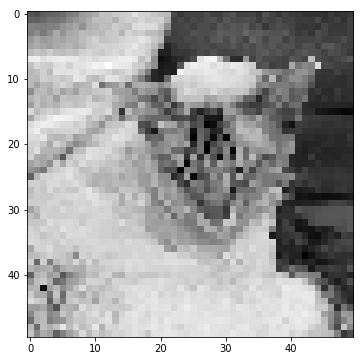

In [165]:
classify_image(0)

**Yay!** He's a cat now!

100%|██████████| 2/2 [00:00<00:00, 37.54it/s]


cat_images/gandalf_sleeping.png
cat_images/gandalfbox.jpg
cat: 0.9879319071769714, dog: 0.012068120762705803


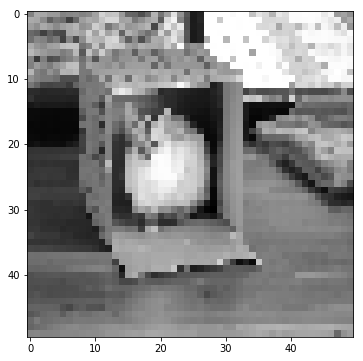

In [166]:
classify_image(1)

This model seems to be identifying Gandalf well, but, unfortunately, it does not do this well on all photographs. When I try it out on a set of assorted images, it does not do a very good job picking out all the cat pictures.

[Top](#Entertaining-Felines)


In [168]:
CLASSIFY_DIR = 'non_cat_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_num = img.split('.')[0] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_num])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

100%|██████████| 2/2 [00:00<00:00, 18.55it/s]


non_cat_images/Wiring.jpg
non_cat_images/Aarhus.png
cat: 0.0018981918692588806, dog: 0.9981018900871277


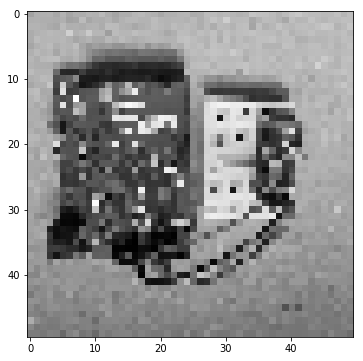

In [169]:
classify_image(0)

100%|██████████| 2/2 [00:00<00:00, 18.71it/s]


non_cat_images/Wiring.jpg
non_cat_images/Aarhus.png
cat: 0.00010593505430733785, dog: 0.9998940229415894


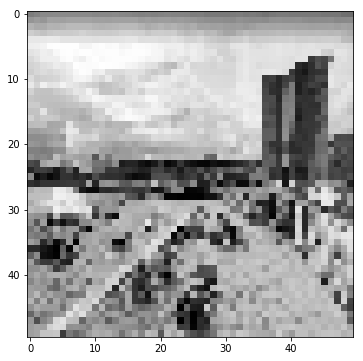

In [170]:
classify_image(1)

In [171]:
CLASSIFY_DIR = 'sample_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_name = img.split('.')[0:2] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_name])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

In [174]:
classifying_data = create_classify_data()

def classify_image(num, classifying_data):

    # I want a single photo classified for this - just checking it functions
    # (I am not splitting this set of photos for train/test)
    classify = classifying_data[:] 
    X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in classify]

    d = classifying_data[num]
    img_data, img_name = d

    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict([data])[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")
    print(f"cat: {prediction[0]}, dog: {prediction[1]}")
    if(prediction[0] > [prediction[1]]):
        print(img_name,"This is a cat")
    else:{
        print(img_name,"This is NOT a cat")
    }

 60%|██████    | 6/10 [00:00<00:00, 50.95it/s]

sample_images/image.5.jpg
sample_images/image.4.jpg
sample_images/image.6.jpg
sample_images/image.7.jpg
sample_images/image.3.jpg
sample_images/image.2.jpg
sample_images/image.0.jpg
sample_images/image.1.jpg
sample_images/image.9.jpg
sample_images/image.8.jpg


100%|██████████| 10/10 [00:00<00:00, 49.54it/s]


## Final Dataset Attempt

As a final attempt, I went to a number of Kaggle sites and downloaded there datasets. Using a combination of images obtained in this way, I created a "non-cat" training set of 12,500 images, to be combined with the 12,500 "cat" images from the dog/cat dataset. When training, this dataset seems to provide around 90% accuracy very quickly (within the first epoch), but again, when testing for validation -- the model seems to let us down.

In [173]:
import cv2
import numpy as np
import os         
from random import shuffle 
from tqdm import tqdm      
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
%matplotlib inline

TRAIN_DIR = 'train_f'
TEST_DIR = 'test_f'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'

In [142]:
def create_label_f(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-3]
    #print(word_label)
    if word_label == 'cat':
        return np.array([1,0])
    elif word_label == 'non_cat':
        return np.array([0,1])
    


In [143]:
def create_train_data_f():
    training_data_f = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        try:
            path = os.path.join(TRAIN_DIR, img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            training_data_f.append([np.array(img_data), create_label_f(img)])
        except Exception as e:
            print(str(e))
    shuffle(training_data_f)
    np.save('train_data_f.npy', training_data_f)
    return training_data_f

def create_test_data_f():
    testing_data_f = []
    for img in tqdm(os.listdir(TEST_DIR)):
        try:
            path = os.path.join(TEST_DIR,img)
            img_num = img.split('.')[0]
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            testing_data_f.append([np.array(img_data), img_num])
        except Exception as e:
            print(str(e))
    shuffle(testing_data_f)
    np.save('test_data_f.npy', testing_data_f)
    #print(len(testing_data_f))
    return testing_data_f


In [144]:
# If dataset is not created:
train_data_f = create_train_data_f()
test_data_f = create_test_data_f()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
trainf = train_data_f[:-500]
testf = train_data_f[-500:]
X_trainf = np.array([i[0] for i in trainf]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_trainf = [i[1] for i in trainf]
X_testf = np.array([i[0] for i in testf]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_testf = [i[1] for i in testf]

 15%|█▌        | 3776/25001 [00:10<01:06, 320.72it/s]

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 71%|███████   | 17649/25001 [00:53<00:27, 264.89it/s]

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 16%|█▌        | 1940/12501 [00:06<00:35, 299.10it/s]

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 12501/12501 [00:40<00:00, 310.43it/s]


In [145]:
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_trainf}, {'targets': y_trainf}, n_epoch=3, 
          validation_set=({'input': X_testf}, {'targets': y_testf}), 
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.19095 | time: 69.286s
| Adam | epoch: 003 | loss: 0.19095 - acc: 0.9216 -- iter: 24448/24499
Training Step: 1149  | total loss: 0.18633 | time: 70.446s
| Adam | epoch: 003 | loss: 0.18633 - acc: 0.9232 | val_loss: 0.27692 - val_acc: 0.9000 -- iter: 24499/24499
--


In [146]:
CLASSIFY_DIR = 'cat_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_name = img.split('.')[0] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_name])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

In [147]:
def classify_image(num):
    classifying_data = create_classify_data()
    # I want a single photo classified for this - just checking it functions
    # (I am not splitting this set of photos for train/test)
    classify = classifying_data[:] 
    X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in classify]

    d = classifying_data[num]
    img_data, img_name = d

    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict([data])[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")
    print(f"cat: {prediction[0]}, dog: {prediction[1]}")

100%|██████████| 2/2 [00:00<00:00, 25.59it/s]


cat_images/gandalf_sleeping.png
cat_images/gandalfbox.jpg
cat: 0.9879319071769714, dog: 0.012068120762705803


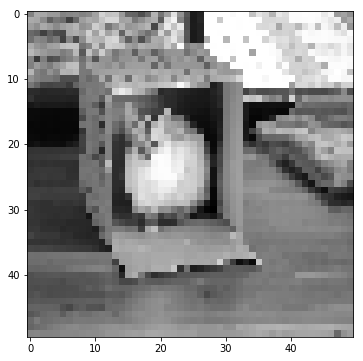

In [148]:
classify_image(1)

In [156]:
CLASSIFY_DIR = 'non_cat_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_name = img.split('.')[0] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_name])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

In [157]:
def classify_image(num):
    classifying_data = create_classify_data()
    # I want a single photo classified for this - just checking it functions
    # (I am not splitting this set of photos for train/test)
    classify = classifying_data[:] 
    X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in classify]

    d = classifying_data[num]
    img_data, img_name = d

    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict([data])[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")
    print(f"cat: {prediction[0]}, dog: {prediction[1]}")

100%|██████████| 2/2 [00:00<00:00, 17.96it/s]


non_cat_images/Wiring.jpg
non_cat_images/Aarhus.png
cat: 0.0018981918692588806, dog: 0.9981018900871277


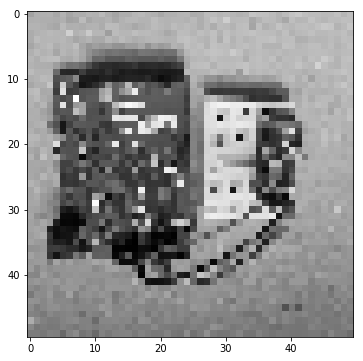

In [158]:
classify_image(0)

Again, although the model manages to classify these individual images well enough, in actual use, the system is not reliable differentiating between "cat" images and "non-cat" images.

[Top](#Entertaining-Felines)

In [193]:
CLASSIFY_DIR = 'sample_images'

def create_classify_data():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_name = img.split('.')[0:2] # not actually a number for these photos
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_name])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

In [195]:
classifying_data = create_classify_data()

def classify_image(num, classifying_data):

    # I want a single photo classified for this - just checking it functions
    # (I am not splitting this set of photos for train/test)
    classify = classifying_data[:] 
    X_classify = np.array([i[0] for i in classify]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in classify]

    d = classifying_data[num]
    img_data, img_name = d

    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict([data])[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")
    print(f"cat: {prediction[0]}, dog: {prediction[1]}")
    if(prediction[0] > [prediction[1]]):
        print(img_name,"This is a cat")
    else:{
        print(img_name,"This is NOT a cat")
    }

100%|██████████| 9/9 [00:00<00:00, 51.62it/s]

sample_images/image.5.jpg
sample_images/image.4.jpg
sample_images/image.6.jpg
sample_images/image.7.jpg
sample_images/image.3.jpg
sample_images/image.2.jpg
sample_images/image.0.jpg
sample_images/image.1.jpg
sample_images/image.8.jpg


Image 0
cat: 0.37976938486099243, dog: 0.6202306151390076
['image', '5'] This is NOT a cat
Image 1
cat: 0.34269267320632935, dog: 0.6573073863983154
['image', '4'] This is NOT a cat
Image 2
cat: 0.11808133870363235, dog: 0.881918728351593
['image', '6'] This is NOT a cat
Image 3
cat: 0.338482141494751, dog: 0.6615179181098938
['image', '7'] This is NOT a cat
Image 4
cat: 0.5162084698677063, dog: 0.48379144072532654
['image', '3'] This is a cat
Image 5
cat: 0.7397061586380005, dog: 0.2602938413619995
['image', '2'] This is a cat
Image 6
cat: 0.08605033904314041, dog: 0.9139496088027954
['image', '0'] This is NOT a cat
Image 7
cat: 0.3861715793609619, dog: 0.6138284802436829
['image', '1'] This is NOT a cat
Image 8
cat: 0.16176776587963104, dog: 0.8382322192192078
['image', '8'] This is NOT a cat


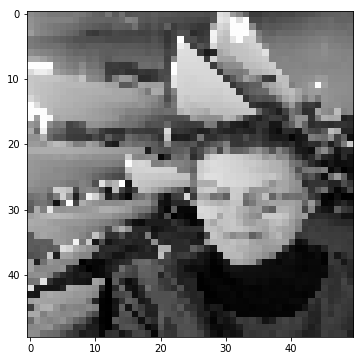

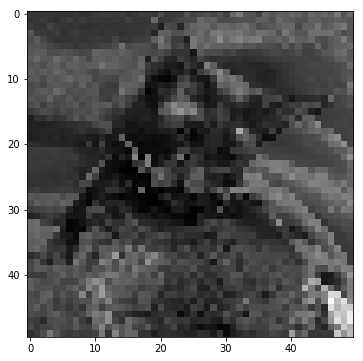

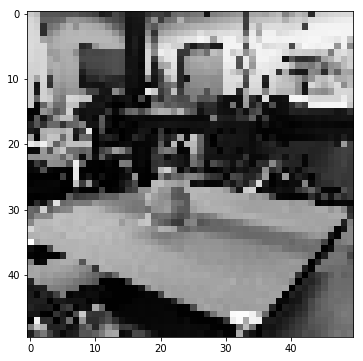

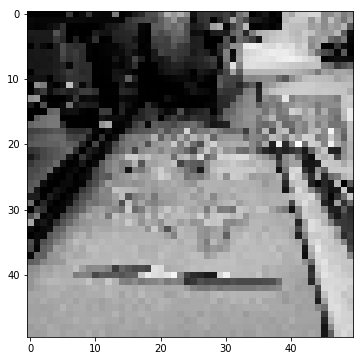

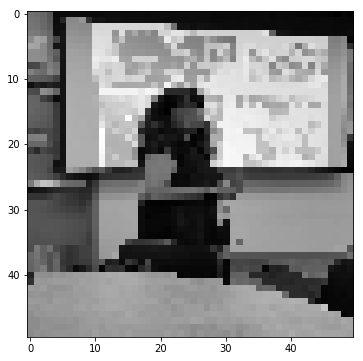

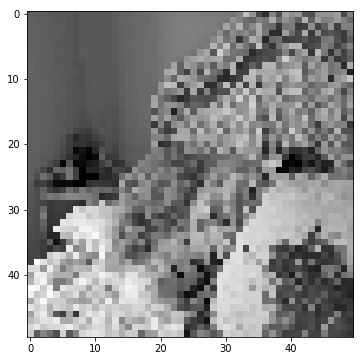

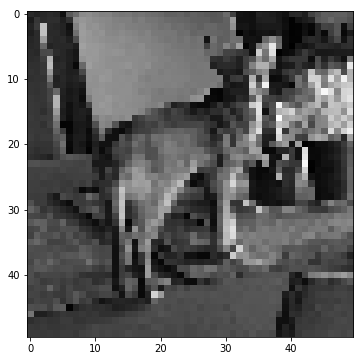

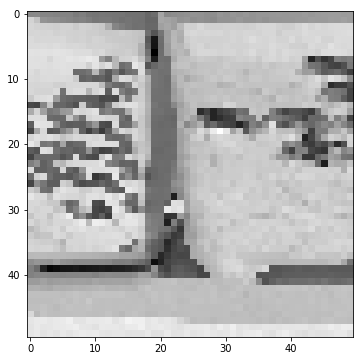

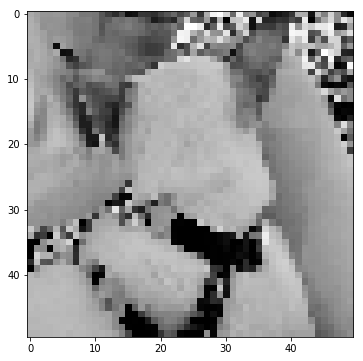

In [196]:
for j in range(len(classifying_data)):
    print("Image", j)
    classify_image(j, classifying_data)
    

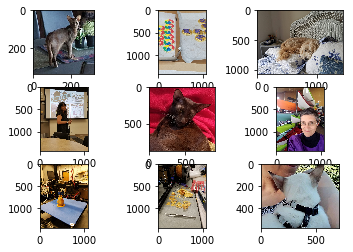

In [197]:
# plot sample images
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'sample_images'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + '/image.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In this small dataset, image 0, image 4, and image 8 are cat photos. The model identifies none of these -- but it does think image 2 and image 3 are cats. Although I am not satisfied with the models I have tried and tested, it is necessary to move on to the rest of the project, namely, setting up an Arduino-based cat-detection and response system.

[Top](#Entertaining-Felines)

## Collecting Images

Now would probably be a good time to talk about collecting image files. I started out with the cat & dog dataset from Kaggle, but found that it really didn't represent the sort of classification task I was interested in. I was not going to be trying to distinuish between examples of two similar-appearing mammals. 

Instead, I thought I was faced with a much easier classification task -- cats versus just about anything else the camera could potentially be exposed to, and (in all likelihood, since I do not have a dog and don't expect to ever expose my cats to any) *NO* dogs!

However, creating an appropriate training set turned out to be *MUCH* harder than I had anticipated. Even though I was able to find many random images of all different sorts of things, they didn't do a great job of creating a model for use with this feline entertainment system. I tried using small datasets, large datasets, and personalized datasets. I tried changing the number of epochs the model used, when the model seemed to be achieving high accuracy early on (I hoped this would prevent overfitting). Still, even when I had good results on the training data, I had issues in the real world.

## Communicating with the Arduino

Since I need to be able to get information from the Arduino about *when* a cat might be nearby, I am using the ultrasonic distance sensor. Once the sensor sends a signal to my laptop that something has been detected nearby, the camera is activated. The 10-second video taken by the camera is processed into 20 still images, which are then tested for the presence of cats.

If a cat is detected, Python sends a message *to* a second Arduino to activate the servo motor for 30 seconds. During this time, the proximity sensor is to still monitoring for the continued presence of a cat. If the servo motor is running when the signal to activate is received, the message will be ignored.

In [56]:
# check for available ports -- looking for usbmodems
!ls /dev/tty.*

/dev/tty.Bluetooth-Incoming-Port /dev/tty.usbmodem14201
/dev/tty.usbmodem14101


The camera records 10 seconds of video. This video is then processed into a set of still images (jpg files) that get stored in the "captured_images" directory. Each new video overwrites the one before it. Theoretically, the files in "captured_images" should be overwritten, but the process doesn't always create the same number of image files -- it creates between 19-21 images (usually 20). So, sometimes, records can be left behind if the contents of the file are not purged completely.

In [57]:
CLASSIFY_DIR = 'captured_images'

def create_classify_data_captured():
    classifying_data = []
    for img in tqdm(os.listdir(CLASSIFY_DIR)):
        path = os.path.join(CLASSIFY_DIR,img)
        print(path)
        img_num = img.split('.')[0][5:]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        classifying_data.append([np.array(img_data), img_num])
    np.save('classify_data.npy', classifying_data)
    return classifying_data

This method loops through the images in the "captured_images" directory and predicts whether or not there are any images of cats. It could perform better. In real-world use, it seems to be overly prone to identifying cats -- even where none are present. In an attempt to compensate for this, I have tried setting the cutoff for cat identification to be a cat probability of over 0.9, but it still seems to see cats everywhere.

In [175]:
# This will check contents of captured images for any picture with a cat
def check_for_cats():
    image_array = create_classify_data_captured
    predicting_data = []
    
    #print("images in dir")
    #print(os.listdir('./captured_images'))
    for img in tqdm(os.listdir('./captured_images')):
        path = os.path.join('./captured_images',img)
        #print(path)
        img_num = img.split('.')[0][5:]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        predicting_data.append([np.array(img_data), img_num])

    np.save('predicting_data.npy', predicting_data)
    
    X_classify = np.array([i[0] for i in predicting_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_classify= [i[1] for i in predicting_data]

    
    #print("len of predicting_data")
    #print(len(predicting_data))
    #print(predicting_data)
    
    # return true (1) if cat predicted with probability > 0.9
    for i in range(len(predicting_data)):
        d = predicting_data[i]
        #print(i)
        img_data, img_num = d
        print("image number:", img_num)

        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
        prediction = model.predict([data])[0]
        
        print(f"cat: {prediction[0]}, dog: {prediction[1]}")
        
        if (prediction[0] > .9):
            return 1
    return 0

Here, I am using two different Arduino boards ( a [Leonardo](https://store.arduino.cc/usa/leonardo) and an [Uno](https://store.arduino.cc/usa/arduino-uno-rev3)) so that I can work with two serial ports at the same time. This lets me have the proximity sensor be "on" contiuously. When it detects something in range, it signals the camera to activate and record video. This video gets processed by my laptop, and if a cat image is predicted, the servo motor is activated via a second serial port. If the two serial communication channels were not separate, it would be necessary to close down communication with one device before attempting to communicate with the second.


[Top](#Entertaining-Felines)

In [66]:
from time import sleep
import serial
# Establish the connection on a specific port for the proximity sensor
ser_motion = serial.Serial('/dev/tty.usbmodem14201', 9600) 
# Establish the connection on a specific port for the servo motor
ser_servo = serial.Serial('/dev/tty.usbmodem14101', 9600) 
while True:
    received = ser_motion.readline()
    #print(received) # Read the newest output from the Arduino
    stripped = received.decode("utf-8").strip('\r\n')
    converted = int(stripped)
    print(converted)
    sleep(.1) # Delay for one tenth of a second
    if (converted < 100 and converted > 50):
        !python write_to_video_v2.py -o "second.avi"
        
        # Convert the film to a collection of still images
        n = 20
        video = 'second.avi'
        vidcap = cv2.VideoCapture(video)
        success,image = vidcap.read()
        count = 0
        captured = 0
        success = True
        while success:
            if count % n == 0:
                cv2.imwrite("./captured_images/frame%d.jpg" % count, image)     # save frame as JPEG file
                captured += 1
            success,image = vidcap.read()
            #print('Read a new frame: ', success)
            count += 1
        print("captured %d images" % captured)  
        # Need to write instructions for predicting directory contents
        cat_detected = check_for_cats()
        if (cat_detected == 1):
            print("Cat Detected!")
            val = '1'
            ser_servo.write(val.encode())
        else:
            print("No Cat Detected!")
            #ser_servo.write('0')
            
        # delete folder contents in preparation for next set of photos
        # Actually, this seems to get done automatically, with the code
        # causing contents to be rewritten.
        
        images_directory = './captured_images'

        for the_file in os.listdir(images_directory):
            file_path = os.path.join(images_directory, the_file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
                #elif os.path.isdir(file_path): shutil.rmtree(file_path)
            except Exception as e:
                print(e)
        


87
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 21/21 [00:00<00:00, 1842.57it/s]

captured 20 images
image number: 220
cat: 0.8925294876098633, dog: 0.10747049748897552
image number: 40
cat: 0.6276170015335083, dog: 0.37238308787345886
image number: 340
cat: 0.8941708207130432, dog: 0.10582924634218216
image number: 180
cat: 0.8955634832382202, dog: 0.10443653166294098
image number: 80
cat: 0.6474055051803589, dog: 0.3525944948196411
image number: 380
cat: 0.7773000597953796, dog: 0.22269992530345917
image number: 140
cat: 0.9429503679275513, dog: 0.05704965442419052
Cat Detected!
89


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2025.74it/s]

captured 20 images
image number: 220
cat: 0.9212231040000916, dog: 0.07877685129642487
Cat Detected!
88


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 1645.79it/s]

captured 20 images
image number: 220
cat: 0.9164585471153259, dog: 0.08354149758815765
Cat Detected!
87


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2050.05it/s]

captured 20 images
image number: 220
cat: 0.8581868410110474, dog: 0.14181318879127502
image number: 40
cat: 0.7687255144119263, dog: 0.2312745302915573
image number: 340
cat: 0.8263130784034729, dog: 0.17368687689304352
image number: 180
cat: 0.9114235043525696, dog: 0.08857651054859161
Cat Detected!
85


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2132.01it/s]

captured 20 images
image number: 220
cat: 0.8579382300376892, dog: 0.1420617699623108
image number: 40
cat: 0.8756954669952393, dog: 0.12430459260940552
image number: 340
cat: 0.8592431545257568, dog: 0.14075687527656555
image number: 180
cat: 0.8622898459434509, dog: 0.13771019876003265
image number: 80
cat: 0.9153504967689514, dog: 0.08464954048395157
Cat Detected!
62


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2195.63it/s]

captured 20 images
image number: 220
cat: 0.9549071192741394, dog: 0.04509289935231209
Cat Detected!
64


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2127.20it/s]

captured 20 images
image number: 220
cat: 0.6302374601364136, dog: 0.3697625398635864
image number: 40
cat: 0.8883354663848877, dog: 0.11166449636220932
image number: 340
cat: 0.8986757397651672, dog: 0.10132420808076859
image number: 180
cat: 0.8306816816329956, dog: 0.1693183034658432
image number: 80
cat: 0.8307168483734131, dog: 0.1692831665277481
image number: 380
cat: 0.9413447380065918, dog: 0.058655302971601486
Cat Detected!
46
45


45
242
75
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2129.68it/s]

captured 20 images
image number: 220
cat: 0.9260198473930359, dog: 0.07398023456335068
Cat Detected!
246
80


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 2142.03it/s]

captured 20 images
image number: 220
cat: 0.9163511991500854, dog: 0.08364876359701157
Cat Detected!
27
248


247
83
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 19/19 [00:00<00:00, 1474.93it/s]

captured 19 images
image number: 220
cat: 0.9212831258773804, dog: 0.07871686667203903
Cat Detected!
77


[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 18/18 [00:00<00:00, 1979.12it/s]

captured 18 images
image number: 220
cat: 0.9736310839653015, dog: 0.026368940249085426
Cat Detected!
214
214


214
214
214
214
214
214
175
214
143
214
214
214
214
214
215
214
215
215
214
216
220
82
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 1184.90it/s]

captured 20 images
image number: 220
cat: 0.9265912175178528, dog: 0.07340876013040543
Cat Detected!
214
214


214
214
215
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
215
214
214
214
214
214
214
214
214
214
215
214
214
214
127
90
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 18/18 [00:00<00:00, 1464.15it/s]

captured 18 images
image number: 220
cat: 0.8139207363128662, dog: 0.1860792487859726
image number: 40
cat: 0.8594495058059692, dog: 0.14055046439170837
image number: 340
cat: 0.8089575171470642, dog: 0.1910424381494522
image number: 180
cat: 0.8729605674743652, dog: 0.12703938782215118
image number: 80
cat: 0.863196849822998, dog: 0.13680322468280792
image number: 140
cat: 0.884105920791626, dog: 0.11589410901069641
image number: 280
cat: 0.8177211284637451, dog: 0.1822787970304489
image number: 120
cat: 0.8882242441177368, dog: 0.11177574843168259
image number: 240
cat: 0.8295490145683289, dog: 0.17045094072818756
image number: 20
cat: 0.8503748774528503, dog: 0.14962512254714966
image number: 320
cat: 0.817123532295227, dog: 0.18287654221057892
image number: 100
cat: 0.8811464905738831, dog: 0.11885345727205276
image number: 0
cat: 0.8649348616600037, dog: 0.13506516814231873
image number: 300
cat: 0.8066102862358093, dog: 0.19338975846767426
image number: 260
cat: 0.803029954433441

214
214
214
214
214
214
214
215
176
214
214
214
214
214
214
215
214
214
214
214
214
214
214
214
214
214
214
214
214
214
47
214
214
214
214
214
214
215
214
214
214
215
214
214
214
214
214
214
214
214
214
214
214
214
215
214
214
214
214
215
215
214
215
214
214
214
214
214
214
214
214
215
214
214
214
214
214
214
214
214
214
215
214
214
215
214
214
215
214
215
215
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
214
215
214
214
214
215
214
214
214
214
215
214
216
217
214
1697
173
2290
2288
279
30
219
216
213
213
214
214
213
213
213
213
213
213
213
186
213
213
101
213
213
214
213
213
213
213
213
214
213
213
214
213
213
214
213
213
213
213
213
213
213
213
213
214
131
213
166
213
213
214
213
213
213
213
214
213
213
214
213
213
213
213
213
46
213
108
91
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 18/18 [00:00<00:00, 714.94it/s]

captured 18 images
image number: 220
cat: 0.8255116939544678, dog: 0.17448829114437103
image number: 40
cat: 0.8242032527923584, dog: 0.1757967472076416
image number: 340
cat: 0.8226617574691772, dog: 0.17733828723430634
image number: 180
cat: 0.8511419296264648, dog: 0.14885808527469635
image number: 80
cat: 0.8187559247016907, dog: 0.18124406039714813
image number: 140
cat: 0.8259398937225342, dog: 0.17406010627746582
image number: 280
cat: 0.8352764844894409, dog: 0.16472351551055908
image number: 120
cat: 0.8105428814888, dog: 0.18945716321468353
image number: 240
cat: 0.814500629901886, dog: 0.18549934029579163
image number: 20
cat: 0.8121233582496643, dog: 0.18787668645381927
image number: 320
cat: 0.8259827494621277, dog: 0.1740172952413559
image number: 100
cat: 0.8179635405540466, dog: 0.18203642964363098
image number: 0
cat: 0.8269641995429993, dog: 0.17303584516048431
image number: 300
cat: 0.8302921056747437, dog: 0.16970787942409515
image number: 260
cat: 0.823816895484924

213
213
82
[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 17/17 [00:00<00:00, 1514.22it/s]

captured 17 images
image number: 220
cat: 0.8336400389671326, dog: 0.16635990142822266
image number: 40
cat: 0.8453113436698914, dog: 0.15468858182430267
image number: 180
cat: 0.828147292137146, dog: 0.1718527227640152
image number: 80
cat: 0.8337989449501038, dog: 0.16620099544525146
image number: 140
cat: 0.827248215675354, dog: 0.1727517992258072
image number: 280
cat: 0.838153064250946, dog: 0.16184698045253754
image number: 120
cat: 0.839069128036499, dog: 0.16093088686466217
image number: 240
cat: 0.8352994322776794, dog: 0.16470064222812653
image number: 20
cat: 0.8412939310073853, dog: 0.15870611369609833
image number: 320
cat: 0.8318108916282654, dog: 0.16818909347057343
image number: 100
cat: 0.8285341262817383, dog: 0.17146582901477814
image number: 0
cat: 0.8162949681282043, dog: 0.18370500206947327
image number: 300
cat: 0.8313077092170715, dog: 0.16869224607944489
image number: 260
cat: 0.8343766331672668, dog: 0.16562335193157196
image number: 60
cat: 0.8397120833396912

[INFO] warming up camera...
[INFO] cleaning up...


100%|██████████| 20/20 [00:00<00:00, 1479.84it/s]

captured 20 images
image number: 220
cat: 0.8601522445678711, dog: 0.1398477554321289
image number: 40
cat: 0.8443855047225952, dog: 0.1556144505739212
image number: 340
cat: 0.8568128943443298, dog: 0.14318707585334778
image number: 180
cat: 0.8588126301765442, dog: 0.1411873698234558
image number: 80
cat: 0.8452857136726379, dog: 0.15471428632736206
image number: 380
cat: 0.998178243637085, dog: 0.0018217969918623567
Cat Detected!


SerialException: write failed: [Errno 6] Device not configured

## User Testing

Even though the CNN classification system is not working perfectly, the prototype is functional enough to do some user testing. The users were given training on the task (see photos below), and both subjects indicated that they understood what was expected of them. The subjects were not compensated in any material way, which might explain some of their unruly behavior during the actual testing session.

Test Subject 1 - Tatlim

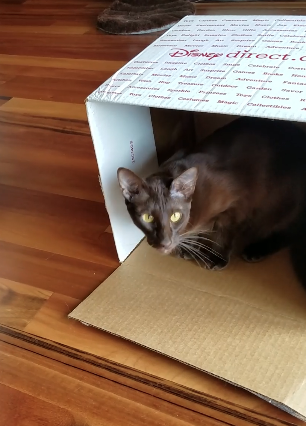


Test Subject 2 - Gandalf

[](attachment:gandalfbox.jpg)
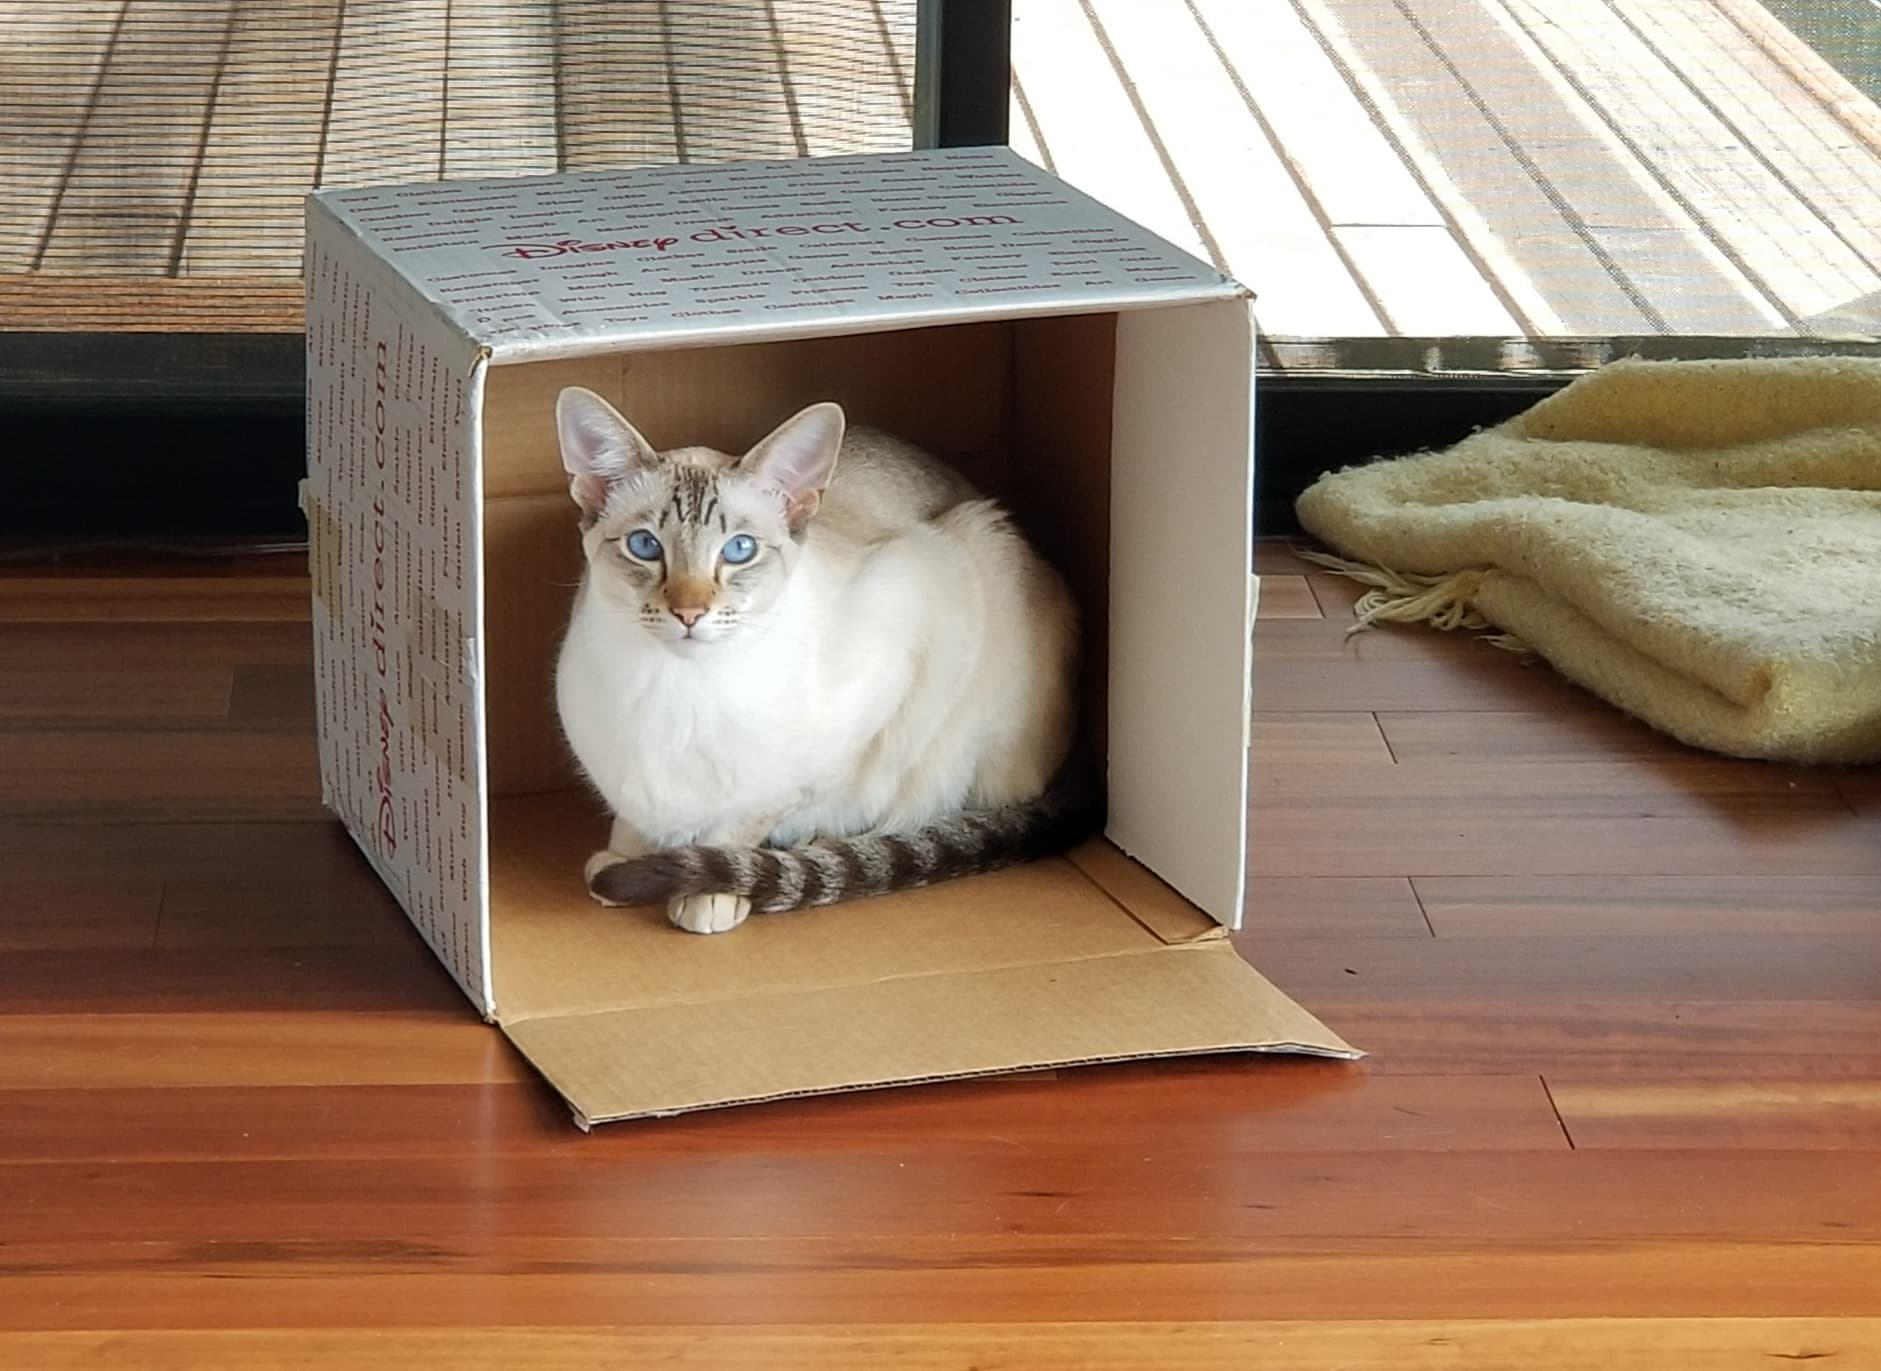

In [ ]:
## Session Recordings

In [182]:
# https://gist.github.com/christopherlovell/e3e70880c0b0ad666e7b5fe311320a62
from IPython.display import HTML

#https://youtu.be/wp5FL17cGc8

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wp5FL17cGc8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


In [183]:
# https://youtu.be/TFwLOpdDApE

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/TFwLOpdDApE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


## Challenges and Learning

Although this project did not seem overly complicated to me when I proposed it, it ended up having its share of challenges. I grossly underestimated the difficulty of developing an effecting ML model for classifying a specific set of images and thought available datasets would be more useful in substituting for missing customized training images. If I had realized from the start how much of an issue this would turn out to be, I might have worked harder initially to create a customized, representative training dataset.

I also encountered issues with time, especially when I was knocked off my feet for a week by an aggressive cold. I still worked on the project during that week, but I am not sure whether I made more or less progress by doing so. I would have liked to have incorporated some Laser Cut items in this project -- specifically, I was thinking it would be nice to have personalized boxes to hold the electronic components of the project. It would have been fun designing some cat-themed patterns for them.

I was happy to discover that the Arduino component of the project came together pretty easily, even though I was using new components and asking them to do new things (i.e. interface with Python). I was frustrated when I was not able to make the Adafruit Camera work, but I did look into the problem, and with certain specialized components, there are workarounds for this, so it is a possibility for the future.

Using a standalone camera, rather than the camera in my laptop, has a lot of advantages -- it will make the final prototype more portable, it will be easier to use, and it will be easier to monitor the progess of the interaction. Since the camera needs to face towards the cats, the laptop screen and keyboard were both rendered essentially useless during user studies and testing.

I learned a lot about machine learning and appreciated being able to try out both the Keras and Tensorflow libraries. I saw several good videos that explained that the different commands were contributing (or were meant to contribute) to the model. I chose to run all the training/testing/predicting locally. These processes may have been completed more efficiently over Colab, but I didn't feel my task warranted more than local computation, given its trivial (but fun) desired outcome. The model I ended up using did not use very high fielity images for its classification -- this may have contributed to the classification issues I encountered, but I think any effect from this would have been overshadowed by the issues with the training dataset. I also learned how to record audio tracks on [OBS: Open Broadcaster Software](https://obsproject.com/), though I ended up not being able to attach these to my Youtube videos.


[Top](#Entertaining-Felines)

## Final Verdict

The Feline Entertainment System, demoed in its original prototype version, met with the approval of 100% of the users participating in the user study (2/2). They both approved of the enticing sound made by the servo motor when it activated and noted that it caused the toy to twitch in a very intriguing manner. Both noted that the servo motor needed to be of a more durable construction for future prototypes. 

The users both liked that the system was contained within a cardboard box. However, both users felt the box could have been a little bit larger. That would have allowed the string of the toy to be longer and it would have been able to swing more easily and wouldn't have been as likely to interfere with the proximity sensor.

Neither user felt the computer under and behind the box either detracted from or contributed to their interaction with the device. The substitution of a standalone camera could thus be made without negatively affecting the user experience.

The prototype creator agrees with these observations, and thanks her users for their efforts and feedback.


## Future Work

- Create a more appropriate training data set
- Get a separate camera component working, so that the laptop can be used to run and monitor the system
- Create a more customized appearance for the unit, with laser cut boxes. This would require another round of user testing, as cats do love cardboard boxes
- Get a more durable motor to perform the manipulation of the toy, and enclose this unit in a box as well to protect it from overly enthusiastic users

[Top](#Entertaining-Felines)

## References

**NOTE:** This is a partial listing of major resources/tutorials. More citations are present as links in the body of the notebook.

**Machine Learning**

- [https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)
- [https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)
- [https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)
- [https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b](https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b)

*datasets*

- [https://www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data)
- [https://www.kaggle.com/puneet6060/intel-image-classification#seg_train.zip](https://www.kaggle.com/puneet6060/intel-image-classification#seg_train.zip)
- [https://www.kaggle.com/moltean/fruits](https://www.kaggle.com/moltean/fruits)
- [https://www.kaggle.com/jessicali9530/celeba-dataset#img_align_celeba.zip](https://www.kaggle.com/jessicali9530/celeba-dataset#img_align_celeba.zip)
- [https://www.kaggle.com/c/google-ai-open-images-object-detection-track/data](https://www.kaggle.com/c/google-ai-open-images-object-detection-track/data)


*for future reference*

- [https://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/](https://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/)



**Arduino**

- [https://www.mouser.com/ds/2/737/ttl-serial-camera-932886.pdf](https://www.mouser.com/ds/2/737/ttl-serial-camera-932886.pdf)
- [https://www.winkleink.com/2012/05/arduino-hc-sr04-ultrasonic-distance.html](https://www.winkleink.com/2012/05/arduino-hc-sr04-ultrasonic-distance.html)
- [https://electronut.in/a-simple-python-to-arduino-alert-scheme/](https://electronut.in/a-simple-python-to-arduino-alert-scheme/)
- [https://www.instructables.com/id/Interface-Python-and-Arduino-with-pySerial/](https://www.instructables.com/id/Interface-Python-and-Arduino-with-pySerial/)

*for future reference*
- [https://learn.adafruit.com/ttl-serial-camera/circuitpython-usage](https://learn.adafruit.com/ttl-serial-camera/circuitpython-usage)
- [https://openhomeautomation.net/wireless-camera](https://openhomeautomation.net/wireless-camera)

**Using my Laptop Camera**

-[https://www.pyimagesearch.com/2016/02/22/writing-to-video-with-opencv/](https://www.pyimagesearch.com/2016/02/22/writing-to-video-with-opencv/)